<a href="https://colab.research.google.com/github/MiriamToledo/AA_PRACTICA1_GRUPO_5/blob/main/AA_PRACTICA1_GRUPO_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: Diseño, entrenamiento y test de un sisteda de redes de neuronas artificiales
### Grupo 5
### Miriam Toledo
### Inés Sánchez
A continuación, vamos a crear un modelo de red de neuronas artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Para ello vamos emplear Keras, específicamente el conjunto de datos Fashion-MNIST.
## 1- IMPORTAMOS TODAS LAS LIBRERÍAS NECESARIAS 
También nos aseguramos de ejecutar la versión 2.0.0 de TensorFlow.


In [83]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np

2.6.0
GPU Available: []
2.6.0


## 2- CARGAMOS EL CONJUNTO DE DATOS Y ANALIZAMOS QUE TENGAN LA FORMA ESPERADA

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(len(train_labels))
# Vemos la matriz de la imagen número 1500
print(train_images[1500])
num = train_labels[1500]
print(num)

(60000, 28, 28)
60000
[[  0   0   0   0   0   0   0   0   0  59 144 141 146 149 163 150  58  70
   92   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  87 139 165 176 176 177 204 133 114
  129   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 136 194 161 158 195 130 182 158 198
  184  87   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 183 160 148 164 110 165 154 157
  163  65   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 137 139 164 162 159 176 162 147
  150  62   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17 198 157 168 165 202 218 171 166 156
  164  71   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  59 181 116 151 155 214 193 202 159 123
  147  58   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72 158 105 136 161 138 181 230 146 119
  134  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  85 144 

La clasificación corresponde con:


0.   Camiseta /Top
1. Pantalón
2. Jersey
3. Vestido
4. Abrigo
5. Sandalia
6. Camisa
7. Zapatillas
8. Bolsa
9. Botas tobilleras




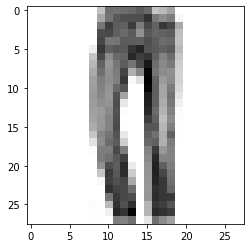

In [4]:
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Zapatillas', 'Bolsa', 'Botas tobilleras']
#Comprobamos que es, efectivamente un pantalón
digit = train_images[1500]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos la forma de los datos de prueba y tienen la misma forma que los datos de entrenamiento.

In [5]:
print(test_images.shape)
print(len(test_labels))


(10000, 28, 28)
10000


## 3- CONSTRUCCIÓN DE LA RNA
### 3.1 - Caso 1
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador sgd.

In [6]:
red1 = models.Sequential()
red1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
red1.add(layers.Dense(10, activation = 'softmax'))
red1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red1.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [7]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Después, preparamos los datos de las imágenes transdormandolos en tensores y normanizándolos. 


In [8]:
train_images = train_images.reshape((60000, 28 * 28))
print(train_images, len(train_images), train_images.shape, train_images[3000])
train_images = train_images.astype('float32') / 255
print(train_images, len(train_images), train_images.shape, train_images[3000])
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 60000 (60000, 784) [  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   3
   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239 255 216
 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159 108   0   0
   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145
 178 159 174 160 123 132 142 172  38   0   0   0   0   0   0   0   0   0
   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167
 122   0   0   0   0   0   0   0   0   0   0   0 171 135 120 114 118 119
 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0
   0   0   0   4 171 138 126 120 117 118 102 122 145 111 1

Ahora preparamos las etiquetas. Para eso utilizamos _Flatten_ que sirve para aplanar la entrada y que así coincidan las dimensiones de la red, para así poder entrenarla. Además, de esta forma podremos usar la función de pérdida sparse_categorical_crossentropy, que explicaremos más adelante.



In [9]:
red1.add(layers.Flatten(input_shape=(28,28)))

Por último entrenamos la red a través de fit, realizando 5 épocas de entrenamiento y en mini lotes de 128 imagenes en cada uno.

In [10]:
red1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.5699 - accuracy: 0.4561
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9294 - accuracy: 0.6873
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7809 - accuracy: 0.7311
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7080 - accuracy: 0.7581
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6581 - accuracy: 0.7796


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [11]:
test_loss, test_acc = red1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.7733


Vemos que nuestra red neuronal tiene una precisión de 0.78 y una pérdida de 0.61.


In [12]:
print('test_acc:', test_acc)

test_acc: 0.7732999920845032


### 3.2 - Caso 2
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador rmsprop.

In [13]:
red2 = models.Sequential()
red2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
red2.add(layers.Dense(10, activation = 'softmax'))
red2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red2.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [14]:
red2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [15]:
red2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9427 - accuracy: 0.6867
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.8183
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.8358
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.8453
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.8504


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [16]:
test_loss, test_acc = red2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8394


Vemos que nuestra red neuronal tiene una precisión de 0.83 y una pérdida de 0.46.


In [17]:
print('test_acc:', test_acc)

test_acc: 0.8393999934196472


### 3.3 - Caso 3
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador sgd.

In [18]:
red3 = models.Sequential()
red3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
red3.add(layers.Dense(10, activation = 'softmax'))
red3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red3.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [19]:
red3.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [20]:
red3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1327 - accuracy: 0.3545
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8496 - accuracy: 0.5236
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6524 - accuracy: 0.5500
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5039 - accuracy: 0.5738
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3868 - accuracy: 0.6054


Después verificamos el modelo ya entrenado con el conjunto de pruebas.


In [21]:
test_loss, test_acc = red3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.3398 - accuracy: 0.6150


Vemos que nuestra red neuronal tiene una precisión de 0.61 y una pérdida de 1.32.


In [22]:
print('test_acc:', test_acc)

test_acc: 0.6150000095367432


### 3.4 - Caso 4
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador rmsprop.

In [23]:
red4 = models.Sequential()
red4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
red4.add(layers.Dense(10, activation = 'softmax'))
red4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red4.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [24]:
red4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [25]:
red4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3860 - accuracy: 0.6429
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8510 - accuracy: 0.7734
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6442 - accuracy: 0.8069
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.8234
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.8339


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [26]:
test_loss, test_acc = red4.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.8250


Vemos que nuestra red neuronal tiene una precisión de 0.82 y una pérdida 0.51.


In [27]:
print('test_acc:', test_acc)

test_acc: 0.824999988079071


### 3.5 - Caso 5
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador sgd.

In [28]:
red5 = models.Sequential()
red5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
red5.add(layers.Dense(10, activation = 'softmax'))
red5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red5.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [29]:
red5.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [30]:
red5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 1.0168 - accuracy: 0.6946
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6553 - accuracy: 0.7940
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5775 - accuracy: 0.8145
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5359 - accuracy: 0.8245
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5096 - accuracy: 0.8318


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [31]:
test_loss, test_acc = red5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.8221


Vemos que nuestra red neuronal tiene una precisión de 0.82 y una pérdida de 0.52.


In [32]:
print('test_acc:', test_acc)

test_acc: 0.8220999836921692


### 3.6 - Caso 6
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador rmsprop.

In [33]:
red6 = models.Sequential()
red6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
red6.add(layers.Dense(10, activation = 'softmax'))
red6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red6.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [34]:
red6.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [35]:
red6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.5511 - accuracy: 0.8044
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3790 - accuracy: 0.8609
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3347 - accuracy: 0.8770
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3093 - accuracy: 0.8856
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.2922 - accuracy: 0.8918


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [36]:
test_loss, test_acc = red6.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8692


Vemos que nuestra red neuronal tiene una precisión de 0.87 y una pérdida de 0.34.


In [37]:
print('test_acc:', test_acc)

test_acc: 0.8691999912261963


### 3.7 - Caso 7
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador sgd.

In [38]:
red7 = models.Sequential()
red7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
red7.add(layers.Dense(10, activation = 'softmax'))
red7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red7.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [39]:
red7.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [40]:
red7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 1.7062 - accuracy: 0.5817
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 1.1322 - accuracy: 0.7128
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.9284 - accuracy: 0.7300
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.8262 - accuracy: 0.7430
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.7646 - accuracy: 0.7517


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [41]:
test_loss, test_acc = red7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7526 - accuracy: 0.7487


Vemos que nuestra red neuronal tiene una precisión de 0.74 y una pérdida 0.75.


In [42]:
print('test_acc:', test_acc)

test_acc: 0.7487000226974487


### 3.8 - Caso 8
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador rmsprop.

In [43]:
red8 = models.Sequential()
red8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
red8.add(layers.Dense(10, activation = 'softmax'))
red8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red8.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [44]:
red8.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [45]:
red8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.5866 - accuracy: 0.7927
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4273 - accuracy: 0.8448
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3874 - accuracy: 0.8588
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3603 - accuracy: 0.8678
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3406 - accuracy: 0.8742


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [46]:
test_loss, test_acc = red8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8701


Vemos que nuestra red neuronal tiene una precisión de 0.85 y una pérdida de 0.38.


In [47]:
print('test_acc:', test_acc)

test_acc: 0.8701000213623047


Después de crear los ocho modelos distintos, vemos que el modelo con menor pérdida y mejor precisión, por tanto el mejor modelo, es el sexto con 512 neuronas en la primera capa, función de activación _relu_ y optimizador _rmsprop_.  El peor modelo es el tercero (10 neuronas en la primera capa, función de activación sigmoidea y optimizador _sgd_), ya que es el de mayor pérdida y menor precisión.  
También, comprobamos que mayor cantidad de neuronas no significa mayor precisión, ni menor pérdida. Además, los modelos con el optimizador _rmsprop_ funcionan mejor que los otros modelos, ya que tienen menor pérdida y mayor precisión.  
En cuanto a las funciones de activación, tanto _relu_ como _sigmoid_ funcionan correctamente en todas las redes neuronales. Sin embargo, _relu_ es la más adecuada para problemas de clasificación, como este. 

## 4. COMPARACIÓN CASO 2 Y CASO 7

Seguidamente analizamos e interpretamos los resultados del caso 2 y el 7 frente a sus originales multiplicando por 5 las épocas de entrenamiento.  
Si multiplicamos por 5 las épocas de entrenamiento del caso 2 nos queda lo siguiente:

In [48]:
# Caso 2:
red2.fit(train_images, train_labels, epochs=5*5, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4210 - accuracy: 0.8547
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8581
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.8599
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8611
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8625
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8638
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.8659
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3833 - accuracy: 0.8666
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8671
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8679

In [49]:
test_loss, test_acc = red2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8483


In [50]:
print('test_acc:', test_acc)

test_acc: 0.8482999801635742


Como podemos observar, tiene una pérdida de 0.41, mientras que la pérdida del caso 2 cuando _epoch_= 5 era de 0.46. La precisión con 25 épocas es de 0.85 y con 5 es de 0.83.  
Después de 25 épocas, tanto la precisión como la pérdida son muy similares frente al entrenamiento con 5 épocas, con lo cual creemos que no son necesarias tantas épocas, ya que se produciría un sobreentrenamiento, con 5 son suficientes.  

A continuación, analizamos la misma situación en el caso 7.  
Si multiplicamos por 5 las épocas de entrenamiento del caso 7 nos queda lo siguiente:

In [51]:
#caso 7
red7.fit(train_images, train_labels, epochs=5*5, batch_size=128)

Epoch 1/25
469/469 [==============================] - 3s 7ms/step - loss: 0.7224 - accuracy: 0.7599
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6911 - accuracy: 0.7667
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6665 - accuracy: 0.7723
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6466 - accuracy: 0.7779
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6294 - accuracy: 0.7826
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6148 - accuracy: 0.7872
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6020 - accuracy: 0.7918
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.5907 - accuracy: 0.7956
Epoch 9/25
469/469 [==============================] - 3s 7ms/step - loss: 0.5805 - accuracy: 0.7987
Epoch 10/25
469/469 [==============================] - 3s 7ms/step - loss: 0.5713 - accuracy: 0.8019

In [52]:
test_loss, test_acc = red7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.8160


In [53]:
print('test_acc:', test_acc)

test_acc: 0.8159999847412109


Como podemos observar, tiene una pérdida de 0.47, mientras que la pérdida del caso 7 cuando _epoch_= 5 era de 0.75. La precisión con 25 épocas es de 0.83 y con 5 es de 0.75.  
En este caso, la precisión ha aumentado, y la pérdida ha disminuido. Por tanto, no hay sobreentrenamiento. 

## 5. COMPARACIÓN DEL RENDIMIENTO DEL MODELO EN EL CONJUNTO DE DATOS DE ENTRENAMIENTO

Primero, creamos un conjunto de validación separando 10000 datos de entrenamiento para ver la precisión del modelo durante el entrenamiento con datos que nunca había visto. Después compararemos el rendimiento en cada una de las ocho redes.

In [54]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### Caso 1

In [55]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red1.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 7ms/step - loss: 0.6322 - accuracy: 0.7885 - val_loss: 0.6276 - val_accuracy: 0.7941
Epoch 2/20
98/98 [==============================] - 1s 5ms/step - loss: 0.6247 - accuracy: 0.7914 - val_loss: 0.6215 - val_accuracy: 0.7929
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 0.6180 - accuracy: 0.7941 - val_loss: 0.6143 - val_accuracy: 0.7970
Epoch 4/20
98/98 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.7963 - val_loss: 0.6083 - val_accuracy: 0.7994
Epoch 5/20
98/98 [==============================] - 1s 5ms/step - loss: 0.6054 - accuracy: 0.7982 - val_loss: 0.6030 - val_accuracy: 0.8006
Epoch 6/20
98/98 [==============================] - 1s 6ms/step - loss: 0.5996 - accuracy: 0.8000 - val_loss: 0.5968 - val_accuracy: 0.8029
Epoch 7/20
98/98 [==============================] - 1s 5ms/step - loss: 0.5941 - accuracy: 0.8020 - val_loss: 0.5921 - val_accuracy: 0.8046
Epoch 8/20
98/98 [==

[0.6322422027587891, 0.6246837973594666, 0.6179932355880737, 0.611302375793457, 0.605434238910675, 0.5995901823043823, 0.5940698981285095, 0.5887762308120728, 0.5841414332389832, 0.5794603824615479, 0.5750254988670349, 0.5708898901939392, 0.5667534470558167, 0.5631667375564575, 0.5595317482948303, 0.5558587312698364, 0.5523545145988464, 0.5492500066757202, 0.5461384057998657, 0.5431745052337646]
[0.7885000109672546, 0.7914000153541565, 0.7941200137138367, 0.7962999939918518, 0.7981600165367126, 0.7999799847602844, 0.8019599914550781, 0.8034399747848511, 0.8040000200271606, 0.8055199980735779, 0.8069400191307068, 0.8085600137710571, 0.8091400265693665, 0.8108999729156494, 0.811240017414093, 0.8134199976921082, 0.8139399886131287, 0.8157200217247009, 0.8165599703788757, 0.8166800141334534]
[0.6276445984840393, 0.6214679479598999, 0.6143442988395691, 0.6082708835601807, 0.6030060052871704, 0.5968372821807861, 0.5920721292495728, 0.5869189500808716, 0.584278404712677, 0.5786474347114563, 0

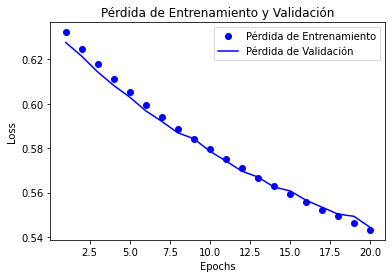

In [56]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

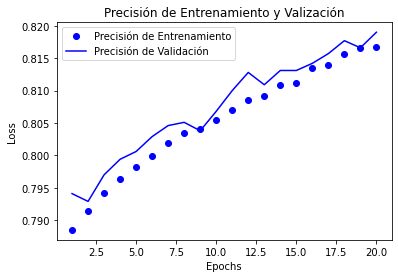

In [57]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora bastante el modelo cuanto mayor sea el número de épocas.

### Caso 2

In [58]:
red2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red2.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 6ms/step - loss: 0.3507 - accuracy: 0.8788 - val_loss: 0.3645 - val_accuracy: 0.8694
Epoch 2/20
98/98 [==============================] - 0s 5ms/step - loss: 0.3484 - accuracy: 0.8791 - val_loss: 0.3578 - val_accuracy: 0.8720
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 0.3468 - accuracy: 0.8785 - val_loss: 0.3620 - val_accuracy: 0.8710
Epoch 4/20
98/98 [==============================] - 0s 5ms/step - loss: 0.3469 - accuracy: 0.8793 - val_loss: 0.3539 - val_accuracy: 0.8763
Epoch 5/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3460 - accuracy: 0.8795 - val_loss: 0.3557 - val_accuracy: 0.8750
Epoch 6/20
98/98 [==============================] - 0s 5ms/step - loss: 0.3453 - accuracy: 0.8792 - val_loss: 0.3580 - val_accuracy: 0.8761
Epoch 7/20
98/98 [==============================] - 0s 5ms/step - loss: 0.3448 - accuracy: 0.8790 - val_loss: 0.3619 - val_accuracy: 0.8731
Epoch 8/20
98/98 [==

[0.3506986200809479, 0.34842678904533386, 0.34678828716278076, 0.3468571603298187, 0.3459688425064087, 0.34529632329940796, 0.34481632709503174, 0.3437544107437134, 0.3442365527153015, 0.34277403354644775, 0.3423745334148407, 0.3421923816204071, 0.34131547808647156, 0.3406502604484558, 0.3399448096752167, 0.3400897681713104, 0.34011757373809814, 0.33907949924468994, 0.3385804295539856, 0.33690449595451355]
[0.8788400292396545, 0.8790799975395203, 0.8784800171852112, 0.8792600035667419, 0.8794800043106079, 0.8792399764060974, 0.8790000081062317, 0.8788400292396545, 0.8793399930000305, 0.8799800276756287, 0.8799800276756287, 0.8800399899482727, 0.8804600238800049, 0.8802800178527832, 0.8802800178527832, 0.8802000284194946, 0.8805199861526489, 0.8806999921798706, 0.8809599876403809, 0.8818600177764893]
[0.36453741788864136, 0.3577892482280731, 0.36196351051330566, 0.3539000153541565, 0.35566791892051697, 0.35804247856140137, 0.3618553578853607, 0.3552602529525757, 0.3570505678653717, 0.35

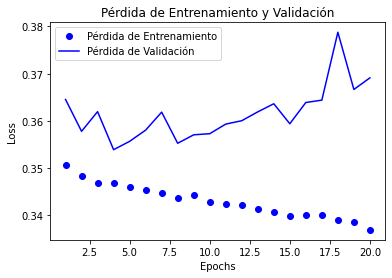

In [59]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que la pérdida de validación se comporta de manera muy diferente a la pérdida de entrenmiento.

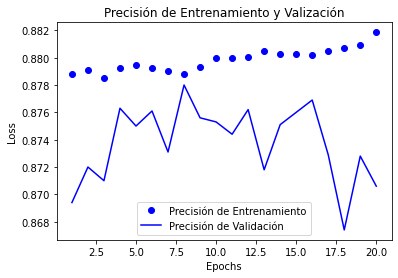

In [60]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también hay una gran diferencia entre ambas.  
Esto se debe a que se ha producido un sobreentrenamiento.

### Caso 3

In [61]:
red3.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red3.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 6ms/step - loss: 1.3266 - accuracy: 0.6221 - val_loss: 1.3129 - val_accuracy: 0.6302
Epoch 2/20
98/98 [==============================] - 0s 5ms/step - loss: 1.3074 - accuracy: 0.6277 - val_loss: 1.2940 - val_accuracy: 0.6348
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2888 - accuracy: 0.6337 - val_loss: 1.2760 - val_accuracy: 0.6392
Epoch 4/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2710 - accuracy: 0.6371 - val_loss: 1.2585 - val_accuracy: 0.6426
Epoch 5/20
98/98 [==============================] - 0s 5ms/step - loss: 1.2537 - accuracy: 0.6412 - val_loss: 1.2416 - val_accuracy: 0.6466
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2371 - accuracy: 0.6439 - val_loss: 1.2254 - val_accuracy: 0.6486
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2210 - accuracy: 0.6476 - val_loss: 1.2096 - val_accuracy: 0.6510
Epoch 8/20
98/98 [==

[1.326620101928711, 1.3073625564575195, 1.2888280153274536, 1.2709664106369019, 1.253713607788086, 1.2370669841766357, 1.2209899425506592, 1.2054706811904907, 1.1904926300048828, 1.1760119199752808, 1.162026286125183, 1.1485075950622559, 1.1354384422302246, 1.1227880716323853, 1.1105563640594482, 1.0987082719802856, 1.0872526168823242, 1.0761488676071167, 1.0654088258743286, 1.0550283193588257]
[0.6221399903297424, 0.6276800036430359, 0.6337000131607056, 0.6371200084686279, 0.641219973564148, 0.6438599824905396, 0.6476200222969055, 0.6496999859809875, 0.6521999835968018, 0.6537799835205078, 0.6570199728012085, 0.6590999960899353, 0.6611599922180176, 0.6649600267410278, 0.6658999919891357, 0.6677200198173523, 0.6700000166893005, 0.6721400022506714, 0.673799991607666, 0.6760600209236145]
[1.3128544092178345, 1.294020652770996, 1.2759958505630493, 1.2585252523422241, 1.2415809631347656, 1.2253614664077759, 1.2096476554870605, 1.1944044828414917, 1.179800033569336, 1.1657272577285767, 1.15

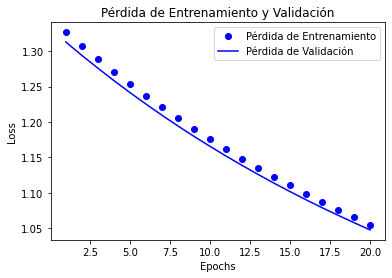

In [62]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

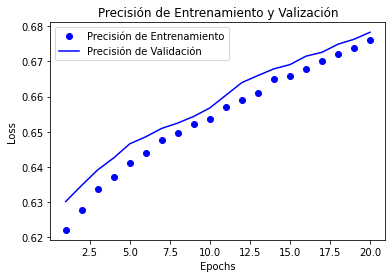

In [63]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora bastante el modelo cuanto mayor sea el número de épocas.

### Caso 4

In [64]:
red4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red4.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 6ms/step - loss: 0.4771 - accuracy: 0.8389 - val_loss: 0.4815 - val_accuracy: 0.8346
Epoch 2/20
98/98 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8415 - val_loss: 0.4716 - val_accuracy: 0.8386
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8431 - val_loss: 0.4657 - val_accuracy: 0.8406
Epoch 4/20
98/98 [==============================] - 1s 5ms/step - loss: 0.4533 - accuracy: 0.8444 - val_loss: 0.4617 - val_accuracy: 0.8427
Epoch 5/20
98/98 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.8456 - val_loss: 0.4547 - val_accuracy: 0.8445
Epoch 6/20
98/98 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.8474 - val_loss: 0.4493 - val_accuracy: 0.8468
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.8486 - val_loss: 0.4457 - val_accuracy: 0.8461
Epoch 8/20
98/98 [==

[0.47711148858070374, 0.46791988611221313, 0.45988863706588745, 0.45328500866889954, 0.44682633876800537, 0.44108104705810547, 0.43633511662483215, 0.4318680167198181, 0.4271140992641449, 0.42303457856178284, 0.4190497398376465, 0.41593989729881287, 0.41266608238220215, 0.4094572365283966, 0.4069254696369171, 0.4037308096885681, 0.40158653259277344, 0.39900174736976624, 0.39712637662887573, 0.3947678208351135]
[0.8388800024986267, 0.8415399789810181, 0.8431000113487244, 0.8443599939346313, 0.8456199765205383, 0.8473600149154663, 0.8485999703407288, 0.8506799936294556, 0.8511199951171875, 0.8521599769592285, 0.8542799949645996, 0.8546000123023987, 0.8547400236129761, 0.8566799759864807, 0.8575800061225891, 0.8586400151252747, 0.8584799766540527, 0.8600199818611145, 0.8604199886322021, 0.8616799712181091]
[0.48151567578315735, 0.4716043472290039, 0.4656965732574463, 0.461702823638916, 0.45471709966659546, 0.4493039548397064, 0.44574007391929626, 0.4431426227092743, 0.44377386569976807, 0

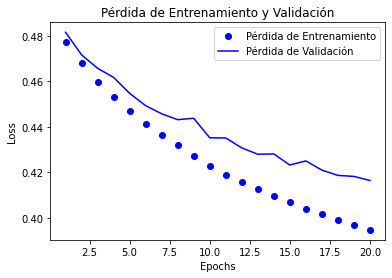

In [65]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que a partir de la tercera época se aprecia más diferencia entre las pérdidas, pero aun así creemos que el modelo mejora bastante después de 18 épocas.

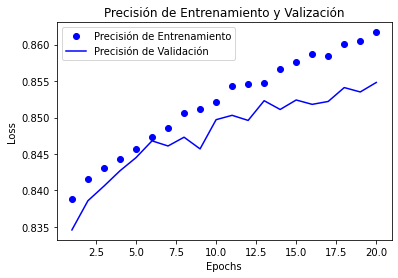

In [66]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que se producen bastantes picos con los datos de validación. Se percibe que lo mejor sería parar en 16 épocas, ya que se trata de un máximo de la función.

### Caso 5

In [67]:
red5.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red5.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 3s 24ms/step - loss: 0.4942 - accuracy: 0.8357 - val_loss: 0.4910 - val_accuracy: 0.8365
Epoch 2/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4905 - accuracy: 0.8367 - val_loss: 0.4875 - val_accuracy: 0.8381
Epoch 3/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4870 - accuracy: 0.8377 - val_loss: 0.4857 - val_accuracy: 0.8392
Epoch 4/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4835 - accuracy: 0.8380 - val_loss: 0.4817 - val_accuracy: 0.8406
Epoch 5/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4802 - accuracy: 0.8395 - val_loss: 0.4787 - val_accuracy: 0.8404
Epoch 6/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4772 - accuracy: 0.8404 - val_loss: 0.4768 - val_accuracy: 0.8427
Epoch 7/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4742 - accuracy: 0.8414 - val_loss: 0.4743 - val_accuracy: 0.8425
Epoch 8/20
98

[0.49423807859420776, 0.4904671013355255, 0.48698726296424866, 0.483531653881073, 0.48024752736091614, 0.4772259294986725, 0.4742090106010437, 0.47164273262023926, 0.468892902135849, 0.46627023816108704, 0.4640566408634186, 0.46171727776527405, 0.45932736992836, 0.4571608304977417, 0.4552258551120758, 0.45301058888435364, 0.45094701647758484, 0.44934749603271484, 0.4474639892578125, 0.4455644488334656]
[0.8357399702072144, 0.836679995059967, 0.837660014629364, 0.8379999995231628, 0.8395199775695801, 0.8403800129890442, 0.8414400219917297, 0.8421199917793274, 0.8429399728775024, 0.8431000113487244, 0.8440600037574768, 0.8446800112724304, 0.8458999991416931, 0.8458799719810486, 0.8468000292778015, 0.8476600050926208, 0.8482999801635742, 0.8480600118637085, 0.8487399816513062, 0.8494600057601929]
[0.4910178780555725, 0.4875219166278839, 0.48565369844436646, 0.481655091047287, 0.47872188687324524, 0.4768016040325165, 0.47426727414131165, 0.47125372290611267, 0.46990785002708435, 0.46800956

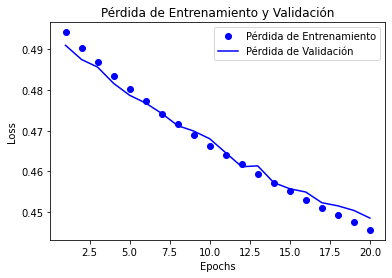

In [68]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

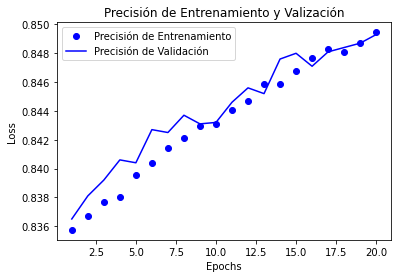

In [69]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que, aprtir de la época 15, tiene más precisión con losd atos que no ha visto nunca que con los de entrenamiento.

### Caso 6

In [70]:
red6.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red6.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 3s 26ms/step - loss: 0.2616 - accuracy: 0.9035 - val_loss: 0.2440 - val_accuracy: 0.9091
Epoch 2/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2467 - accuracy: 0.9084 - val_loss: 0.2513 - val_accuracy: 0.9040
Epoch 3/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2380 - accuracy: 0.9119 - val_loss: 0.2583 - val_accuracy: 0.9058
Epoch 4/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2303 - accuracy: 0.9139 - val_loss: 0.2749 - val_accuracy: 0.8936
Epoch 5/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2232 - accuracy: 0.9168 - val_loss: 0.2435 - val_accuracy: 0.9110
Epoch 6/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2153 - accuracy: 0.9197 - val_loss: 0.2664 - val_accuracy: 0.9012
Epoch 7/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2091 - accuracy: 0.9216 - val_loss: 0.2712 - val_accuracy: 0.9024
Epoch 8/20
98

[0.26157981157302856, 0.2466772049665451, 0.23803433775901794, 0.23033858835697174, 0.22316093742847443, 0.21534374356269836, 0.20907101035118103, 0.20452351868152618, 0.1979691982269287, 0.19205646216869354, 0.18435868620872498, 0.18282103538513184, 0.17694099247455597, 0.172278493642807, 0.1662890762090683, 0.16348987817764282, 0.15706752240657806, 0.15455538034439087, 0.14938385784626007, 0.14546649158000946]
[0.9035400152206421, 0.9084200263023376, 0.9119200110435486, 0.9138799905776978, 0.9168400168418884, 0.9197199940681458, 0.9215599894523621, 0.9238799810409546, 0.9257000088691711, 0.928879976272583, 0.9323599934577942, 0.9307000041007996, 0.9341400265693665, 0.9354000091552734, 0.9374799728393555, 0.9389600157737732, 0.9417999982833862, 0.9424200057983398, 0.9445199966430664, 0.9461399912834167]
[0.243965283036232, 0.25133511424064636, 0.25834059715270996, 0.2749325633049011, 0.24345725774765015, 0.266364187002182, 0.2711576819419861, 0.2725885808467865, 0.24005776643753052, 0

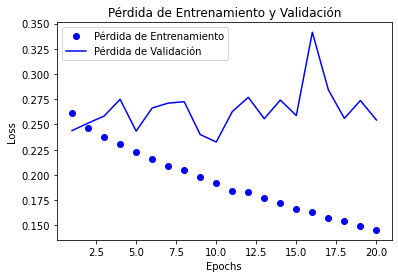

In [71]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que tras 2 épocas, se produce una gran diferencia entre ambas pérdidas, siendo mayor la de los datos de validación. Se ha producido un sobreentrenamiento.

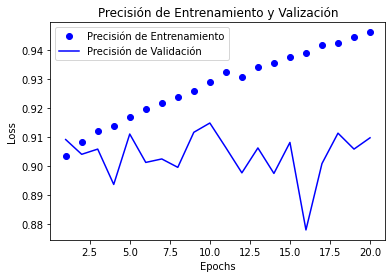

In [72]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también, después de 2 épocas, el modelo pierde precisión con los datos de validación.

### Caso 7

In [73]:
red7.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red7.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 2s 23ms/step - loss: 0.4935 - accuracy: 0.8283 - val_loss: 0.4916 - val_accuracy: 0.8295
Epoch 2/20
98/98 [==============================] - 2s 21ms/step - loss: 0.4928 - accuracy: 0.8282 - val_loss: 0.4906 - val_accuracy: 0.8293
Epoch 3/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4923 - accuracy: 0.8284 - val_loss: 0.4901 - val_accuracy: 0.8303
Epoch 4/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4918 - accuracy: 0.8286 - val_loss: 0.4901 - val_accuracy: 0.8306
Epoch 5/20
98/98 [==============================] - 2s 21ms/step - loss: 0.4911 - accuracy: 0.8289 - val_loss: 0.4895 - val_accuracy: 0.8313
Epoch 6/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4905 - accuracy: 0.8292 - val_loss: 0.4885 - val_accuracy: 0.8308
Epoch 7/20
98/98 [==============================] - 2s 22ms/step - loss: 0.4900 - accuracy: 0.8296 - val_loss: 0.4881 - val_accuracy: 0.8316
Epoch 8/20
98

[0.49352386593818665, 0.4928355813026428, 0.4923454821109772, 0.4917535185813904, 0.49108123779296875, 0.49049168825149536, 0.4900292456150055, 0.48935943841934204, 0.488819420337677, 0.48827800154685974, 0.48768338561058044, 0.4871118664741516, 0.4865978956222534, 0.4859740734100342, 0.48548418283462524, 0.4850975275039673, 0.48441389203071594, 0.48397698998451233, 0.4833172559738159, 0.4829537868499756]
[0.8282999992370605, 0.828220009803772, 0.8284000158309937, 0.8286200165748596, 0.8288800120353699, 0.8291599750518799, 0.8295800089836121, 0.8293799757957458, 0.8294600248336792, 0.8293399810791016, 0.8300999999046326, 0.8299599885940552, 0.8301600217819214, 0.8309400081634521, 0.8306800127029419, 0.8308200240135193, 0.831059992313385, 0.8311799764633179, 0.8313400149345398, 0.8316799998283386]
[0.4915984869003296, 0.49056944251060486, 0.4901057481765747, 0.4901112914085388, 0.4894593358039856, 0.4885074198246002, 0.4881276488304138, 0.48767387866973877, 0.4871196150779724, 0.4870556

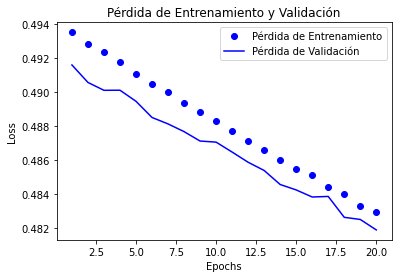

In [74]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

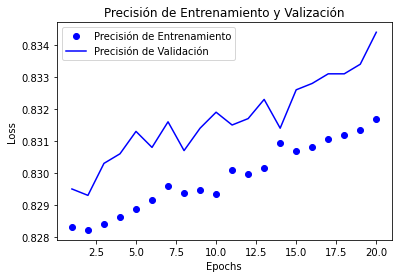

In [75]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora la precisión del modelo frente a los datos que no ha visto nunca, cuantas más épocas de entrenmiento realice.

### Caso 8

In [76]:
red8.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red8.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 3s 25ms/step - loss: 0.3218 - accuracy: 0.8817 - val_loss: 0.3117 - val_accuracy: 0.8833
Epoch 2/20
98/98 [==============================] - 2s 25ms/step - loss: 0.3105 - accuracy: 0.8855 - val_loss: 0.3067 - val_accuracy: 0.8844
Epoch 3/20
98/98 [==============================] - 2s 24ms/step - loss: 0.3033 - accuracy: 0.8880 - val_loss: 0.3017 - val_accuracy: 0.8915
Epoch 4/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2979 - accuracy: 0.8902 - val_loss: 0.3096 - val_accuracy: 0.8861
Epoch 5/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2940 - accuracy: 0.8913 - val_loss: 0.3115 - val_accuracy: 0.8860
Epoch 6/20
98/98 [==============================] - 2s 25ms/step - loss: 0.2891 - accuracy: 0.8933 - val_loss: 0.3092 - val_accuracy: 0.8842
Epoch 7/20
98/98 [==============================] - 2s 24ms/step - loss: 0.2848 - accuracy: 0.8952 - val_loss: 0.3038 - val_accuracy: 0.8856
Epoch 8/20
98

[0.3217642903327942, 0.3104815185070038, 0.30330997705459595, 0.2978938817977905, 0.2939964830875397, 0.28905999660491943, 0.28479069471359253, 0.278641939163208, 0.2732805013656616, 0.2699829041957855, 0.2650023102760315, 0.2613268792629242, 0.25840485095977783, 0.2547283172607422, 0.25111350417137146, 0.24741888046264648, 0.2439788430929184, 0.24025556445121765, 0.2360466569662094, 0.2334602177143097]
[0.8817399740219116, 0.8855400085449219, 0.8879799842834473, 0.8902000188827515, 0.8913000226020813, 0.8932999968528748, 0.8952199816703796, 0.8971999883651733, 0.8984599709510803, 0.9003599882125854, 0.9017599821090698, 0.902679979801178, 0.9046800136566162, 0.9058600068092346, 0.9065399765968323, 0.9073600172996521, 0.9097999930381775, 0.9107000231742859, 0.9136599898338318, 0.914359986782074]
[0.3116615116596222, 0.30670657753944397, 0.30172649025917053, 0.3095536530017853, 0.3114640414714813, 0.3092457950115204, 0.30380481481552124, 0.29201582074165344, 0.3032895624637604, 0.2955458

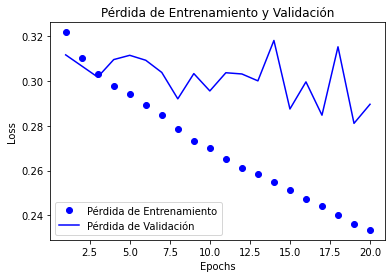

In [77]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que, a partir de la segunda época, la pérdida de los datos que no ha visto nunca es mayor.

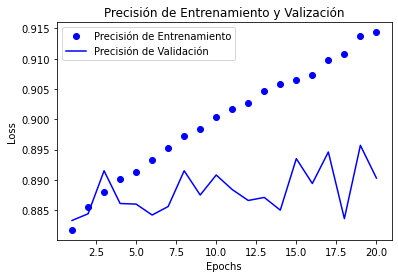

In [78]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también a partir de la segunda época, la precisión con los datos que no ha visto nunca disminuye. Se está produciendo un sobreentrenamiento, para evitarlo, el número de épocas debería ser dos.

Tras evaluar cada uno de los ocho modelos coparando el rendimiento del modelo en el conjunto de los datos de prueba, hemos llegado a la conclusión de que, con el optimizador _sgd_ se consigue mayor precisión y menor pérdida pero se necesitan más épocas. Mientras que con el optimizador _rmsprop_, con 5 o menos épocas, se consiguen una pérdida y precisión similares en los datos de entrenamiento y los que no ha visto nunca.

## 6. PREDICCIONES SOBRE LAS IMÁGENES DE _TEST_
Vamos a realizar predicciones para las 10 primeras imágenes con cada uno de los ocho modelos. Después comentaremos los resultados para la sexta imagen.  
Primero vemos que la sexta imagen corresponde con unos pantalones y transformamos los datos.

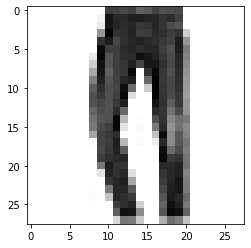

In [116]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [117]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [121]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

### Caso 1

In [137]:
predictions = red1.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[3.6933881e-03 9.7724825e-01 1.9065302e-04 3.5772272e-03 1.5025605e-02
 1.3819197e-09 2.5876740e-04 4.9057157e-06 1.2169196e-06 4.9716649e-09]
[[3.00820176e-07 2.72768575e-05 2.98693885e-05 ... 2.08348617e-01
  9.81920585e-03 5.49486458e-01]
 [2.17607152e-03 1.24239671e-06 8.85483444e-01 ... 3.23106791e-10
  1.57220158e-04 4.25759961e-09]
 [8.80888001e-06 9.99733150e-01 9.71416171e-07 ... 9.75214061e-06
  6.90605884e-09 1.68031422e-10]
 ...
 [5.68250045e-02 1.20894541e-03 1.90968663e-02 ... 1.87571732e-05
  5.78044415e-01 7.39651965e-04]
 [5.38305379e-04 9.75783646e-01 8.41153887e-05 ... 4.37420327e-04
  1.10306555e-05 2.09038080e-06]
 [1.26193272e-05 1.27338059e-03 1.11449219e-03 ... 2.06203982e-01
  2.61927675e-02 2.74081808e-02]]


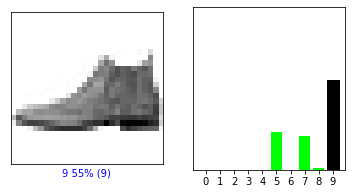

<Figure size 432x288 with 0 Axes>

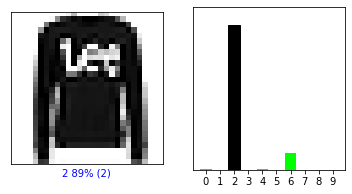

<Figure size 432x288 with 0 Axes>

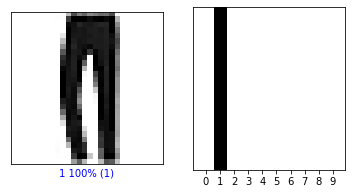

<Figure size 432x288 with 0 Axes>

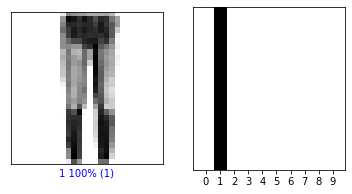

<Figure size 432x288 with 0 Axes>

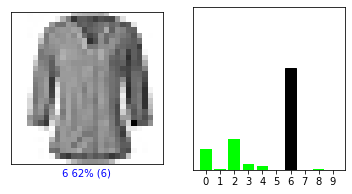

<Figure size 432x288 with 0 Axes>

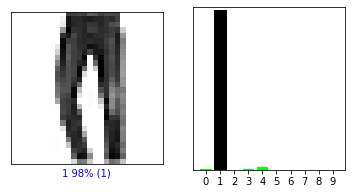

<Figure size 432x288 with 0 Axes>

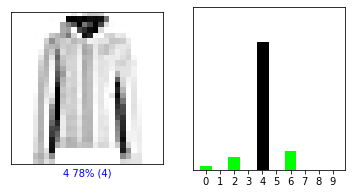

<Figure size 432x288 with 0 Axes>

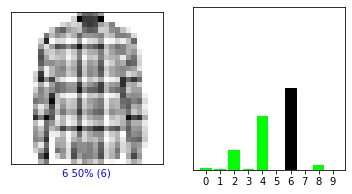

<Figure size 432x288 with 0 Axes>

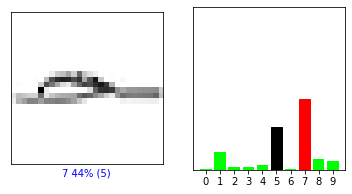

<Figure size 432x288 with 0 Axes>

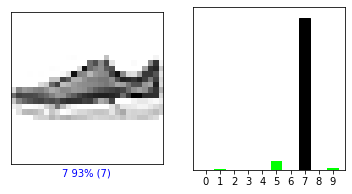

<Figure size 432x288 with 0 Axes>

In [138]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red1.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción comete errores sobre todo en las prendas que no son pantalones, concretamente las chanclas las predice al 44%. Con respecto a la sexta imagen predice casi al 100% que es 1, es decir, pantalones.

### Caso 2

In [139]:
predictions = red2.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[3.8501664e-04 9.9952042e-01 7.9337985e-07 3.1462612e-05 5.2691317e-05
 9.5119725e-11 8.9499790e-06 4.9395876e-18 7.3168809e-07 5.9438022e-16]
[[6.4151259e-08 2.3946142e-10 4.0752751e-16 ... 2.0949524e-02
  2.2286676e-04 9.0472239e-01]
 [1.2691168e-04 2.4155089e-08 8.9567119e-01 ... 1.9355978e-10
  3.7401292e-04 8.8297185e-08]
 [3.1809640e-07 9.9999654e-01 5.2522481e-10 ... 2.0741054e-24
  5.8444172e-10 1.3589260e-22]
 ...
 [5.7751607e-02 1.0498561e-10 5.2656574e-06 ... 5.4409782e-10
  8.5817391e-01 9.7176867e-13]
 [1.3862109e-06 9.9852377e-01 7.2430346e-08 ... 2.5913137e-18
  2.1792378e-08 1.7373250e-18]
 [9.6187996e-06 4.1096961e-08 2.6184183e-11 ... 1.4587888e-02
  2.8689937e-03 1.8647144e-03]]


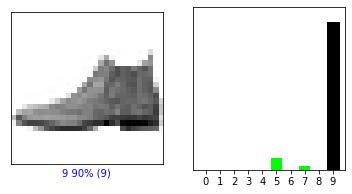

<Figure size 432x288 with 0 Axes>

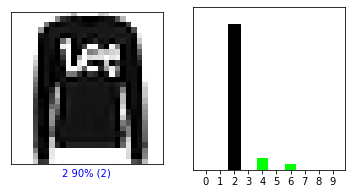

<Figure size 432x288 with 0 Axes>

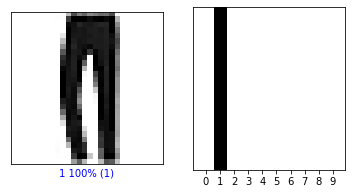

<Figure size 432x288 with 0 Axes>

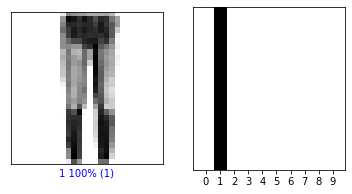

<Figure size 432x288 with 0 Axes>

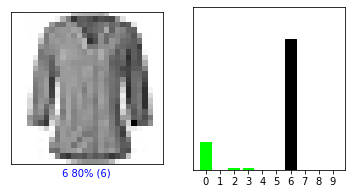

<Figure size 432x288 with 0 Axes>

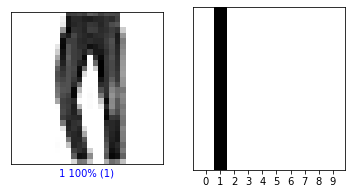

<Figure size 432x288 with 0 Axes>

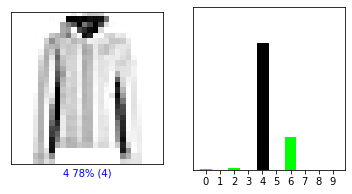

<Figure size 432x288 with 0 Axes>

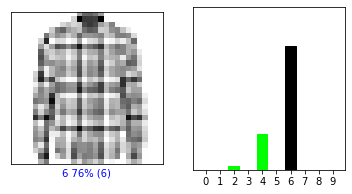

<Figure size 432x288 with 0 Axes>

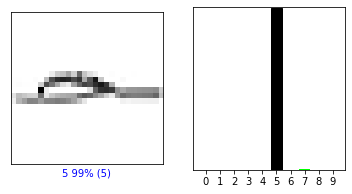

<Figure size 432x288 with 0 Axes>

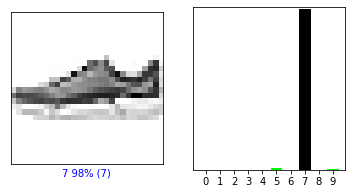

<Figure size 432x288 with 0 Axes>

In [140]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red2.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es del 100% de la sexta imagen. Además lo que mejor predice son los zapatos y los pantalones, aun así lo demás lo predice bastante bien.
### Caso 3

In [141]:
predictions = red3.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[3.4060892e-02 8.5756516e-01 7.1089421e-03 4.6948787e-02 2.3770636e-02
 1.2937504e-02 1.5828911e-02 8.9869142e-04 5.6637631e-04 3.1415699e-04]
[[1.4779792e-03 1.5918022e-03 1.0026124e-02 ... 1.6422299e-01
  3.1053539e-02 5.4823643e-01]
 [2.9424237e-02 1.3219099e-02 6.9453192e-01 ... 4.6898611e-03
  2.9843596e-03 1.5055158e-02]
 [1.0920748e-02 9.2538261e-01 1.8107704e-03 ... 1.6077763e-03
  1.6964352e-04 5.6781719e-04]
 ...
 [2.5688494e-02 1.5863439e-03 6.8110754e-03 ... 1.1972897e-02
  7.6340467e-01 2.8736293e-03]
 [1.1539015e-02 9.0516025e-01 2.2142010e-03 ... 2.0986551e-03
  2.3090237e-04 9.6081541e-04]
 [4.7327913e-03 7.0429575e-03 1.2489828e-02 ... 2.3552787e-01
  6.1148945e-02 9.4427206e-02]]


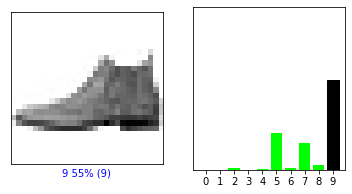

<Figure size 432x288 with 0 Axes>

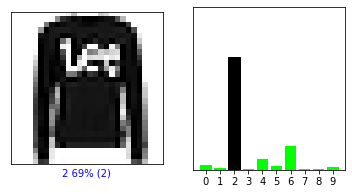

<Figure size 432x288 with 0 Axes>

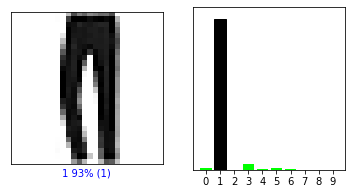

<Figure size 432x288 with 0 Axes>

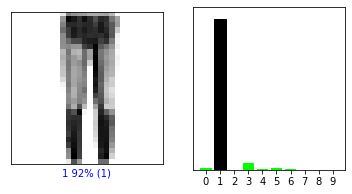

<Figure size 432x288 with 0 Axes>

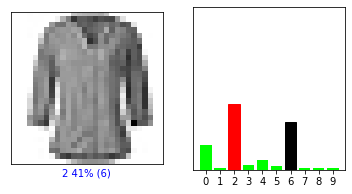

<Figure size 432x288 with 0 Axes>

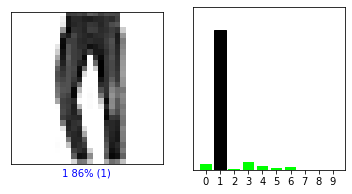

<Figure size 432x288 with 0 Axes>

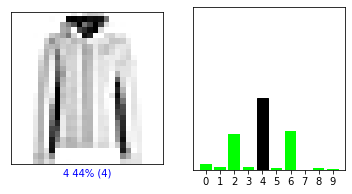

<Figure size 432x288 with 0 Axes>

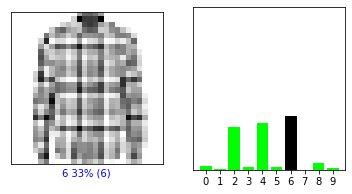

<Figure size 432x288 with 0 Axes>

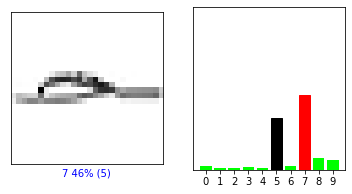

<Figure size 432x288 with 0 Axes>

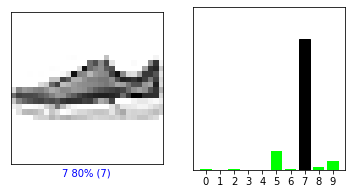

<Figure size 432x288 with 0 Axes>

In [142]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red3.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta figura sigue siendo correcta, pero tiene casos en los que da error. La predice en el 86% de los casos. Con respecto al resto de imágenes, las predice peor que en los modelos anteriores y falla en dos imágenes.
### Caso 4

In [126]:
predictions = red4.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[8.8554444e-03 9.7319734e-01 1.0109213e-04 3.2183640e-03 4.4277431e-03
 3.7173617e-05 7.7091930e-03 1.1733454e-03 1.2664676e-03 1.3871558e-05]
[[2.06977827e-04 1.41005008e-03 1.30581798e-03 ... 9.35582221e-02
  3.54930735e-03 7.88570225e-01]
 [4.08619409e-03 5.71868486e-06 9.52123106e-01 ... 6.14613725e-07
  1.04631006e-04 3.20280787e-06]
 [9.13419528e-04 9.93584812e-01 9.68408040e-06 ... 2.40513333e-03
  1.21614001e-04 1.21841940e-05]
 ...
 [3.62272710e-01 1.25906343e-04 1.40759919e-03 ... 1.36932076e-05
  3.91008765e-01 7.00653072e-06]
 [2.14032130e-04 9.85414386e-01 7.28269060e-06 ... 2.56992673e-04
  4.88418773e-05 5.66458948e-05]
 [9.43354753e-05 1.88789924e-03 5.44283306e-04 ... 1.53633170e-02
  3.90351121e-03 1.26956368e-03]]


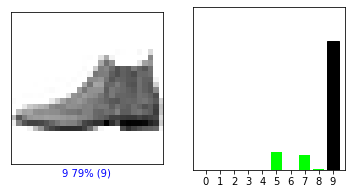

<Figure size 432x288 with 0 Axes>

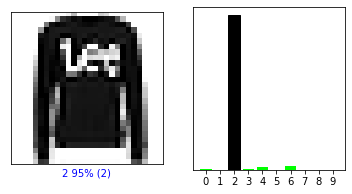

<Figure size 432x288 with 0 Axes>

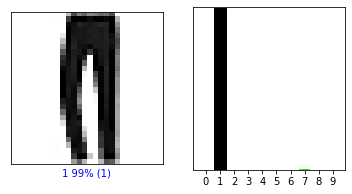

<Figure size 432x288 with 0 Axes>

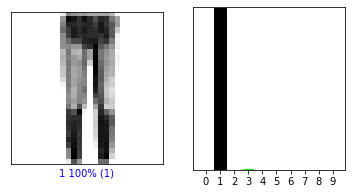

<Figure size 432x288 with 0 Axes>

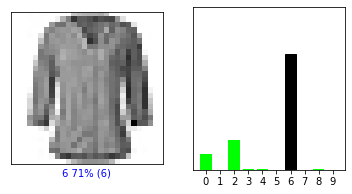

<Figure size 432x288 with 0 Axes>

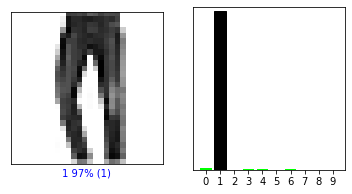

<Figure size 432x288 with 0 Axes>

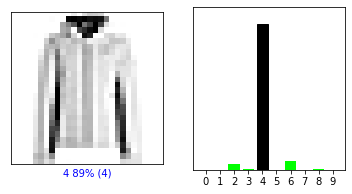

<Figure size 432x288 with 0 Axes>

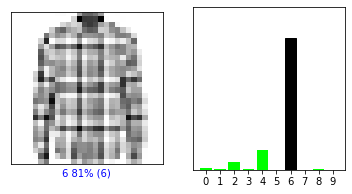

<Figure size 432x288 with 0 Axes>

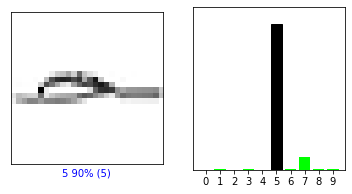

<Figure size 432x288 with 0 Axes>

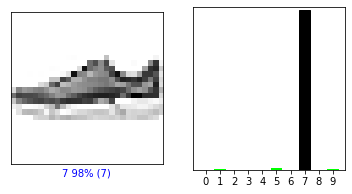

<Figure size 432x288 with 0 Axes>

In [143]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red4.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta imagen es del 97%, mejor que la anterior, pero peor que la predicción de la red 2.  
El resto de imágenes también las predice mejor que la red anterior. 

### Caso 5

In [128]:
predictions = red5.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[5.3871153e-03 9.8130196e-01 1.1160765e-03 1.6351227e-03 1.0313912e-02
 2.0179304e-07 2.2267175e-04 2.0952534e-06 2.0081321e-05 5.8802715e-07]
[[1.36787394e-05 2.59317294e-05 6.36416880e-05 ... 2.12992623e-01
  5.15539991e-03 6.20920658e-01]
 [1.90193197e-04 9.09953633e-06 9.65079248e-01 ... 2.24622143e-09
  4.49753388e-05 6.02850676e-08]
 [3.23994755e-05 9.99781311e-01 9.92562491e-06 ... 1.21425984e-07
  2.66115876e-07 1.52263588e-08]
 ...
 [5.46536148e-02 8.44797542e-05 2.97775283e-03 ... 6.48998772e-04
  7.61705160e-01 2.46388430e-04]
 [1.09830355e-04 9.91165936e-01 1.26990213e-04 ... 1.09323983e-05
  1.03934271e-05 2.21669998e-05]
 [6.07093913e-04 1.72212871e-03 2.27969140e-03 ... 2.21197441e-01
  2.66089812e-02 3.52514349e-02]]


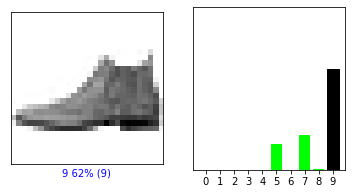

<Figure size 432x288 with 0 Axes>

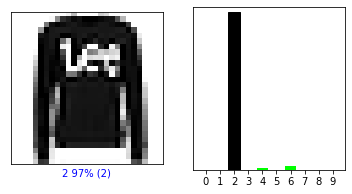

<Figure size 432x288 with 0 Axes>

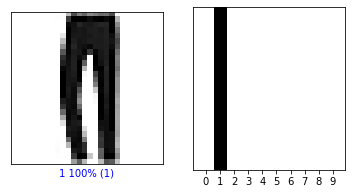

<Figure size 432x288 with 0 Axes>

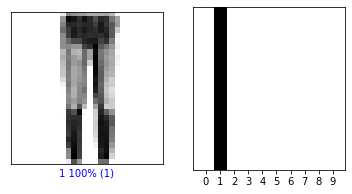

<Figure size 432x288 with 0 Axes>

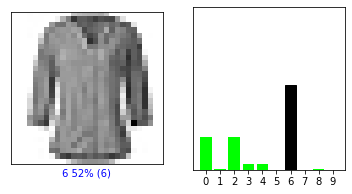

<Figure size 432x288 with 0 Axes>

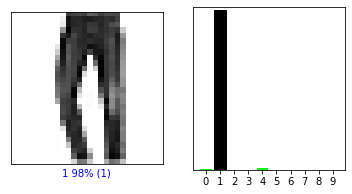

<Figure size 432x288 with 0 Axes>

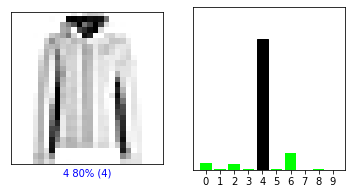

<Figure size 432x288 with 0 Axes>

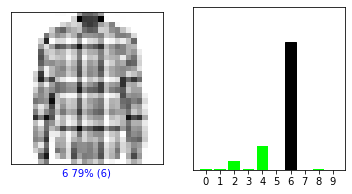

<Figure size 432x288 with 0 Axes>

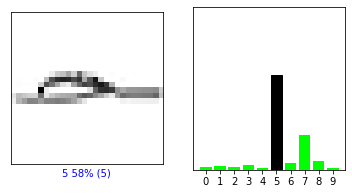

<Figure size 432x288 with 0 Axes>

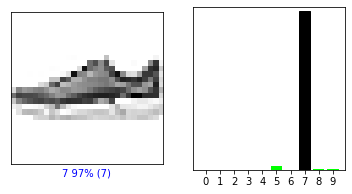

<Figure size 432x288 with 0 Axes>

In [144]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red5.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de los pantalones es muy acertada. La de la sexta imagen es bastante adecuada, aunque en el 2% de ocasiones se confunde con una camiseta o un abrigo, coincidiendo con lo que peor predice el modelo de red. 
### Caso 6

In [145]:
predictions = red6.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[2.7376656e-10 1.0000000e+00 1.6883838e-14 2.4263752e-11 1.3836978e-13
 1.1278277e-21 1.3136326e-12 1.6909275e-28 6.2999859e-19 5.5256235e-23]
[[1.06066302e-11 1.20124959e-14 1.63766552e-11 ... 1.24350903e-04
  5.28705447e-11 9.99874949e-01]
 [1.43543264e-06 1.67958626e-16 9.99989510e-01 ... 2.41451808e-18
  1.34336728e-13 1.01730262e-17]
 [4.12569122e-13 1.00000000e+00 2.48013175e-19 ... 1.96601592e-32
  1.02144535e-20 7.11841161e-30]
 ...
 [4.32045113e-07 8.01133886e-17 3.79669771e-08 ... 1.26720474e-11
  9.99998808e-01 6.56020987e-14]
 [1.27921181e-11 9.99999523e-01 1.15950774e-13 ... 5.71121155e-15
  6.26011829e-12 9.63104074e-15]
 [2.18788880e-08 2.18995221e-11 1.31734097e-07 ... 1.71597596e-04
  3.61157004e-06 9.53310803e-07]]


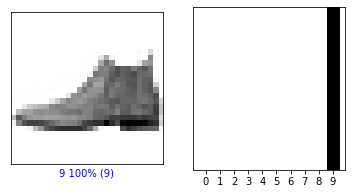

<Figure size 432x288 with 0 Axes>

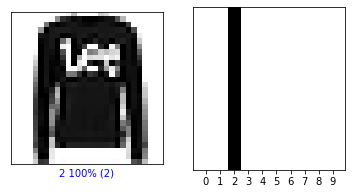

<Figure size 432x288 with 0 Axes>

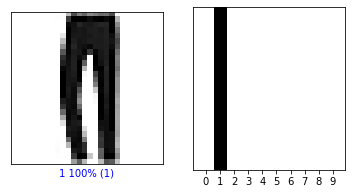

<Figure size 432x288 with 0 Axes>

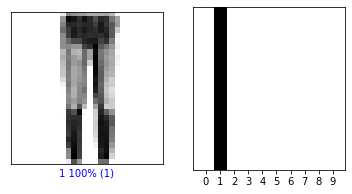

<Figure size 432x288 with 0 Axes>

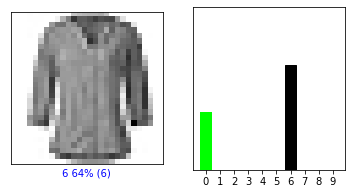

<Figure size 432x288 with 0 Axes>

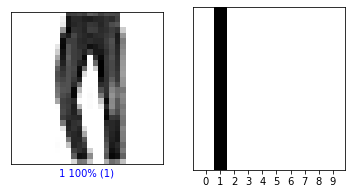

<Figure size 432x288 with 0 Axes>

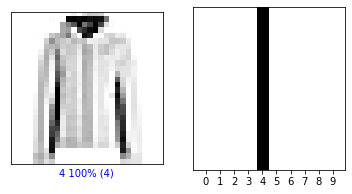

<Figure size 432x288 with 0 Axes>

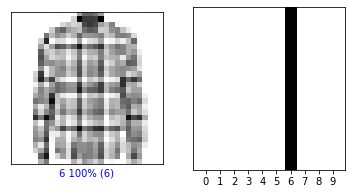

<Figure size 432x288 with 0 Axes>

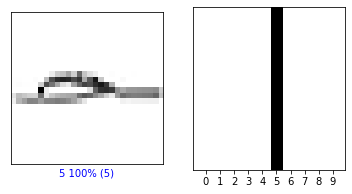

<Figure size 432x288 with 0 Axes>

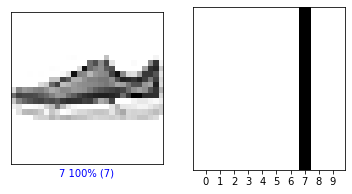

<Figure size 432x288 with 0 Axes>

In [146]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red6.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es exacta en todas las imágenes, nunca se equivoca. Excepto cuando tiene que predecir camisas, que la precisión es del 64%. 
### Caso 7

In [132]:
predictions = red7.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[2.6772534e-03 9.8378527e-01 8.1207417e-04 1.5169894e-03 1.0810497e-02
 4.2616037e-07 3.8061626e-04 4.5221632e-06 1.1890962e-05 3.7470937e-07]
[[2.5584362e-05 1.2779713e-05 1.0751211e-04 ... 3.5820940e-01
  1.0120226e-02 4.4887316e-01]
 [6.7433016e-04 3.5283963e-05 9.0728408e-01 ... 5.9791375e-08
  3.1049343e-04 2.1378846e-06]
 [6.9298527e-05 9.9959904e-01 3.3721717e-05 ... 8.4457866e-07
  4.5707176e-07 2.8439390e-08]
 ...
 [7.7809237e-02 4.8293190e-05 2.9121037e-03 ... 4.9857766e-04
  6.9705141e-01 2.1138990e-04]
 [3.1477117e-04 9.8666555e-01 2.9401382e-04 ... 6.6369568e-05
  5.2104128e-06 1.0242016e-05]
 [4.8272917e-04 4.6738260e-04 2.3244503e-03 ... 2.8918570e-01
  2.4545670e-02 1.7045280e-02]]


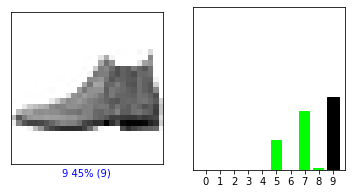

<Figure size 432x288 with 0 Axes>

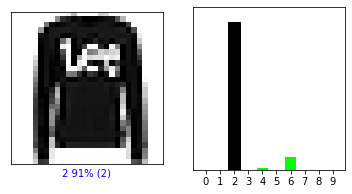

<Figure size 432x288 with 0 Axes>

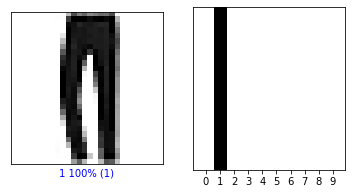

<Figure size 432x288 with 0 Axes>

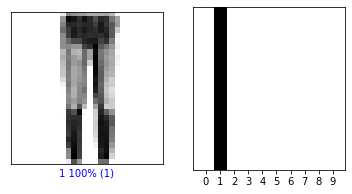

<Figure size 432x288 with 0 Axes>

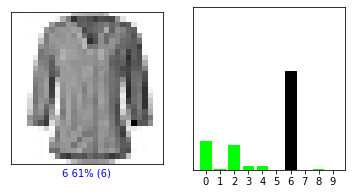

<Figure size 432x288 with 0 Axes>

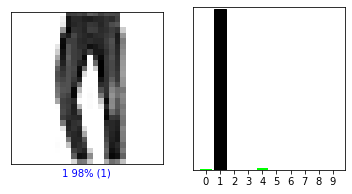

<Figure size 432x288 with 0 Axes>

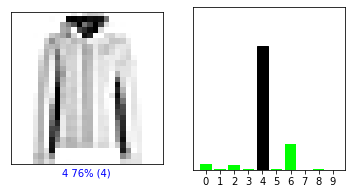

<Figure size 432x288 with 0 Axes>

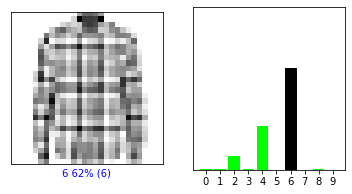

<Figure size 432x288 with 0 Axes>

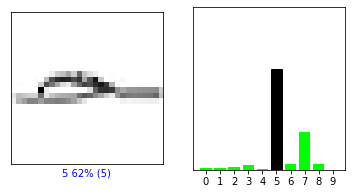

<Figure size 432x288 with 0 Axes>

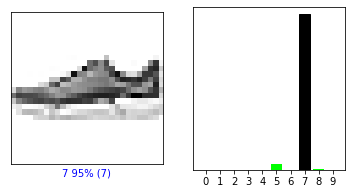

<Figure size 432x288 with 0 Axes>

In [147]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red7.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta figura es similar a la red 5, donde en un 98% acierta. Con respecto al resto de imágenes, por norma general predice muy bien los pantalones, aunque el resto también lo predice correctamente.
### Caso 8

In [134]:
predictions = red8.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[3.7096787e-04 9.9958175e-01 1.1027033e-05 1.1594802e-05 4.4715762e-06
 3.0619278e-11 2.0193982e-05 4.5082178e-09 4.3606246e-08 3.6611847e-10]
[[5.7754244e-07 2.0637172e-08 2.6608092e-07 ... 1.9300366e-02
  5.6902085e-05 8.9966136e-01]
 [3.9696530e-04 9.8093444e-09 9.9213421e-01 ... 7.6491695e-11
  4.1470074e-07 2.6723508e-09]
 [1.3291578e-05 9.9998212e-01 2.5752516e-07 ... 1.6986037e-09
  2.6476231e-08 2.7858386e-11]
 ...
 [1.6889618e-03 4.2150976e-08 4.0622285e-04 ... 1.3258102e-05
  9.8245734e-01 1.5613190e-09]
 [3.1834275e-06 9.9981552e-01 7.1000778e-07 ... 1.0236307e-08
  7.5924852e-08 2.3070348e-07]
 [3.2436766e-08 2.6040754e-09 6.8761329e-07 ... 1.9712998e-04
  1.8663293e-05 2.6212101e-07]]


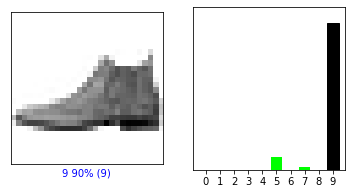

<Figure size 432x288 with 0 Axes>

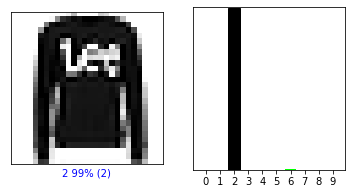

<Figure size 432x288 with 0 Axes>

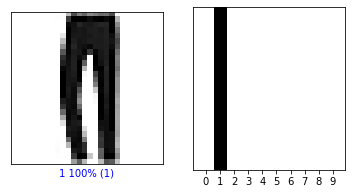

<Figure size 432x288 with 0 Axes>

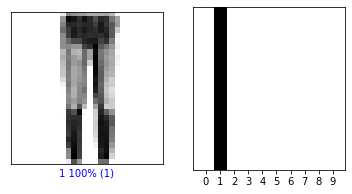

<Figure size 432x288 with 0 Axes>

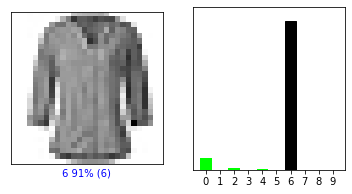

<Figure size 432x288 with 0 Axes>

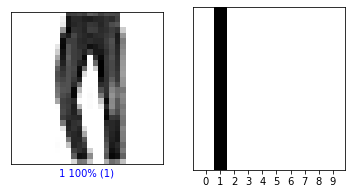

<Figure size 432x288 with 0 Axes>

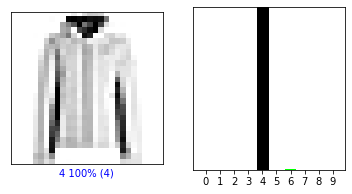

<Figure size 432x288 with 0 Axes>

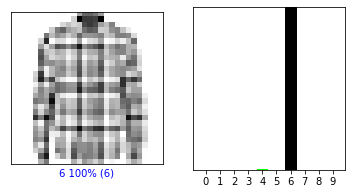

<Figure size 432x288 with 0 Axes>

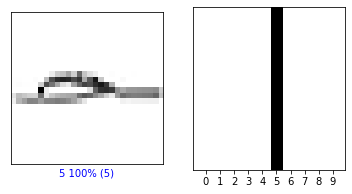

<Figure size 432x288 with 0 Axes>

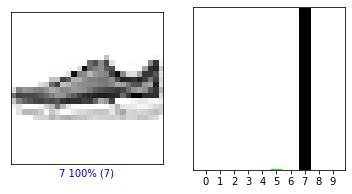

<Figure size 432x288 with 0 Axes>

In [148]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red8.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es también del 100% en la mayoría de los casos, teniendo peor precisión al predecir camisas y botas tobilleras.

Tras llevar a cabo las predicciones en las distintas redes con respecto a la sexta imagen, nos damos cuenta de que los modelos 2, 6 y 8 son los que mejor funcionan, teniendo los tres el optimizador _rmsprop_. El que peor funciona, es el caso 3, coindiciendo con lo visto al crear las redes viendo que era el modelo con mayor pérdida y menor precisión. 

Comprobamos que la red 6 es la que mejor funciona y en todas las redes predice muy bien los pantalones.


## 7. MEJORA DEL MODELO USANDO _ADAM_ EN LA RED 3
Vamos a modificar la RNA tres utilizando el optimizador _adam_ en vez del usado previamente _sgd_.

In [97]:
red3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red3.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 5,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/5
98/98 [==============================] - 1s 6ms/step - loss: 0.9652 - accuracy: 0.6983 - val_loss: 0.9009 - val_accuracy: 0.7178
Epoch 2/5
98/98 [==============================] - 0s 5ms/step - loss: 0.8579 - accuracy: 0.7340 - val_loss: 0.8204 - val_accuracy: 0.7505
Epoch 3/5
98/98 [==============================] - 0s 5ms/step - loss: 0.7844 - accuracy: 0.7603 - val_loss: 0.7556 - val_accuracy: 0.7681
Epoch 4/5
98/98 [==============================] - 0s 5ms/step - loss: 0.7239 - accuracy: 0.7812 - val_loss: 0.6993 - val_accuracy: 0.7879
Epoch 5/5
98/98 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.7961 - val_loss: 0.6546 - val_accuracy: 0.7997


In [ ]:
test_loss, test_acc = red3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8408


Observamos que la pérdida ha disminuido a 0.45 gracias al optimizador _adam_ frente a 1.28 que tenía utilizando _sgd_. Por otro lado, la precisión ha aumentado de 0.61 a 0.84.  
_Adam_ (_Adaptative_ _Moment_ _Estimation_)se puede usar de igual manera que _sgd_, la diferencia es que _adam_ optimizador utiliza una tasa de aprendizaje para cada peso de la red y se adapta a medida que se va entrenando la red.   
_Sgd_ por su parte mantiene la misma tasa de aprendizaje para todos los pesos durante todo el entrenamiento.  
_Adam_ para calcular las tasas de aprendizaje individuales calcula la media decreciente de los gradientes pasados al cuadrado y de los gradientes pasados.  
Respecto a los optimizadores, las principales diferencias entre categorical_crossentropy y sparse_categorical_crossentropy son que categorical_crossentropy produce una matriz de un solo punto que contiene la coincidencia probable para cada categoría mientras que 
sparse_categorical_crossentropy produce un índice de categoría de la categoría de coincidencia más probable.
Muchos modelos categóricos producen una salida sparse_categorical_crossentropy porque se ahorra espacio, pero se pierde mucha información.



# 8.CONCLUSIÓN
Realizando la práctica hemos aprendido a crear una red neuronal desde cero, el funcionamiento y ventajas de unos optimizadores y funciones de pérdida frente a otros, llegando a la conclusión de que el optimizador _rmsprop_ suele funcionar mejor. También hemos aprendido como saber el número adecuado de épocas de entrenamiento a realizar, evaluando los datos de entrenamiento. Además de saber llevar a cabo predicciones con datos que la red no ha visto antes. Por último, hemos comprendido que la precisión o pérdida no van estrictamente ligados al número de neuronas en la red. Tanto los modelos con 10 neuornas como los de 512 funcionan de manera muy similar.   
Para realizar este proyecto nos hemos reunido, tanto presencial como virtualmente, y en general, hemos hecho el trabajo conjuntamente, salvo algunas investigaciones sobre optimizadores, funciones de pérdida, etc, que hemos hecho individualmente. 


# 9. BIBILIOGRAFÍA


*   From SGD to Adam - Blueqat (blueqat Inc. / former MDR Inc.). (2020, 24 mayo).Medium. Recuperado 22 de octubre de 2021, de https://medium.com/mdr-inc/from-sgd-to-adam-c9fce513c4bb

*   What is the difference between sparse_categorical_crossentropy and categorical_crossentropy? (2019, 25 octubre). Stack Overflow. Recuperado 22 de octubre de 2021, de https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c


